In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
dic = {}
list_info = []
list_price = []

In [3]:
digikala_phones_address = "https://www.digikala.com/search/category-mobile-phone/?has_selling_stock=1&pageno=1&sortby=7"

In [4]:
page = requests.get(url=digikala_phones_address)
data = BeautifulSoup(page.content)

In [5]:
# new
pagination = len(data.select(".c-pager__items")[0].get_text())
for i in range(pagination):
    if i==0:
        for tag in data.select(".is-plp"):
            info = (tag.findChildren("div", "c-product-box__title")[0].get_text())
            price = int(tag.findChildren("div", "c-price__value-wrapper")[0].get_text().strip().replace("تومان", "").replace(",", "").rstrip())
            list_info.append(info)
            list_price.append(price)
    else:
        digikala_phones_address = "https://www.digikala.com/search/category-mobile-phone/?has_selling_stock=1&pageno={}&sortby=7".format(str(i+1))
        page = requests.get(url=digikala_phones_address)
        data = BeautifulSoup(page.content)
        for tag in data.select(".is-plp"):
            info = (tag.findChildren("div", "c-product-box__title")[0].get_text())
            price = int(tag.findChildren("div", "c-price__value-wrapper")[0].get_text().strip().replace("تومان", "").replace(",", "").rstrip())
            list_info.append(info)
            list_price.append(price)

In [6]:
table = pd.DataFrame(data={
    "info" : list_info,
    "price" : list_price
})

In [7]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 2 columns):
info     159 non-null object
price    159 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.9+ KB


In [8]:
print("max cell phone is : {}".format(str(table["price"].max())))
print("min cell phone is : {}".format(str(table["price"].min())))
print("cout cell phone is : {}".format(str(table["price"].count())))

max cell phone is : 26799000
min cell phone is : 134000
cout cell phone is : 159


In [9]:
q1 = int(table.price.quantile(0.25))

In [10]:
q2 = int(table.price.quantile(0.5))

In [11]:
q3 = int(table.price.quantile(0.75))

<h3 dir="rtl">گوشی هایی که براساس قیمت در ربع اول قرار دارند</h3>
<h3 dir="rtl">لازم به ذکر است که تمامی گوشی ها از کم ترین قیمت تا بالاترین قیمت مرتب شده اند</h3>

In [12]:
t1 = table[(table["price"] < q1) | (table["price"] == q1)]
t1_sorted = t1.sort_values(by="price")

In [13]:
print('تعداد گوشی ها = %s' % (t1["info"].count()))
print('بیشترین قیمت = %s' % (t1["price"].max()))
print('کمترین قیمت = %s' % (t1["price"].min()))
t1_sorted

تعداد گوشی ها = 40
بیشترین قیمت = 275000
کمترین قیمت = 134000


,info,price
56,گوشی موبایل نوین سان مدل N1803 دو سیم کارت,134000
29,گوشی موبایل داکس مدل B100 دو سیم کارت,139000
22,گوشی موبایل بلو مدل Z5 دو سیم کارت,158000
115,گوشی موبایل نوین سان مدل N2411 دو سیم کارت,163500
106,گوشی موبایل نوین سان مدل N2402 دو سیم کارت,163500
40,گوشی موبایل اینت مدل 3312 دو سیم کارت,165000
68,گوشی موبایل فلای مدل FF190 دو سیم کارت,165000
108,گوشی موبایل جی ال ایکس مدل X POWER2 دو سیم کارت,165000
104,گوشی موبایل جیمو مدل B3310 دو سیم‌کارت,168000
93,گوشی موبایل آلفاموب مدل x9 دو سیم کارت,169000


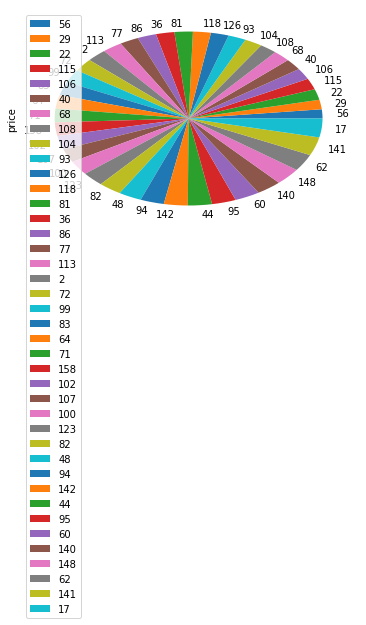

In [15]:
t1_sorted.plot.pie(y="price");

<h3 dir="rtl">گوشی هایی که براساس قیمت در ربع دوم قرار دارند</h3>
<h3 dir="rtl">لازم به ذکر است که تمامی گوشی ها از کم ترین قیمت تا بالاترین قیمت مرتب شده اند</h3>

In [16]:
t2 = table[(table["price"] > q1) & (table["price"] < q2) | (table["price"] == q2)]
t2_sorted = t2.sort_values(by="price")

In [17]:
print('تعداد گوشی ها = %s' % (t2["info"].count()))
print('بیشترین قیمت = %s' % (t2["price"].max()))
print('کمترین قیمت = %s' % (t2["price"].min()))
t2_sorted

تعداد گوشی ها = 40
بیشترین قیمت = 1150000
کمترین قیمت = 277000


,info,price
39,گوشی موبایل نوکیا مدل 105 (2017) دو سیم‌ کارت,277000
109,گوشی موبایل زوم می مدل c58 دو سیمکارت,279000
23,گوشی موبایل نوکیا مدل 2018 106 دو سیم‌ کارت,289000
24,گوشی موبایل اُرُد مدل F240D,289000
135,گوشی موبایل ارد مدل 6303 دو سیم کارت,299000
85,گوشی موبایل ارد مدل 180s دو سیم کارت,299000
110,گوشی موبایل اینت مدل 3520 دو سیم کارت,310000
43,گوشی موبایل هیوندای مدل seoul K1 دو سیم کارت,315000
20,گوشی موبایل نوکیا مدل (2017)130 دو سیم کارت,329000
101,گوشی موبایل بلو مدل Tank4 دو سیم کارت,339000


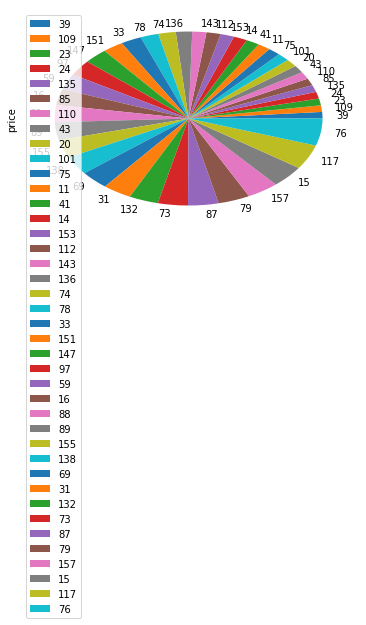

In [18]:
t2_sorted.plot.pie(y="price");

<h3 dir="rtl">گوشی هایی که براساس قیمت در ربع سوم قرار دارند</h3>
<h3 dir="rtl">لازم به ذکر است که تمامی گوشی ها از کم ترین قیمت تا بالاترین قیمت مرتب شده اند</h3>

In [19]:
t3 = table[(table["price"] > q2) & (table["price"] < q3) | (table["price"] == q3)]
t3_sorted = t3.sort_values(by="price")

In [20]:
print('تعداد گوشی ها = %s' % (t3["info"].count()))
print('بیشترین قیمت = %s' % (t3["price"].max()))
print('کمترین قیمت = %s' % (t3["price"].min()))
t3_sorted

تعداد گوشی ها = 39
بیشترین قیمت = 3299000
کمترین قیمت = 1170000


,info,price
103,گوشی موبایل تکنو مدل WX4 Pro دو سیم‌ کارت,1170000
28,گوشی موبایل آنر مدل 7S DUA-L22 دو سیم‌کارت ظرف...,1319000
98,گوشی موبایل لیگو مدل T8s دو سیم کارت ظرفیت 32 ...,1330000
154,گوشی موبایل یلوفون مدل S1 Pro دو سیم‌ کارت ظرف...,1350000
58,گوشی موبایل نوکیا مدل 2.2 دو سیم کارت ظرفیت 16...,1390000
80,گوشی موبایل دوجی مدل X90L دو سیم کارت ظرفیت 32...,1399000
139,گوشی موبایل اچ تی سی مدل Desire 825 دو سیم کارت,1495000
53,گوشی موبایل ایسوس مدل Zenfone Max ZB555KL دو س...,1598000
35,گوشی موبایل نوکیا مدل 3.2 دو سیم کارت با ظرفیت...,1599000
5,گوشی موبایل هوآوی مدل Y5 2019 AMN-LX9 دو سیم ک...,1625000


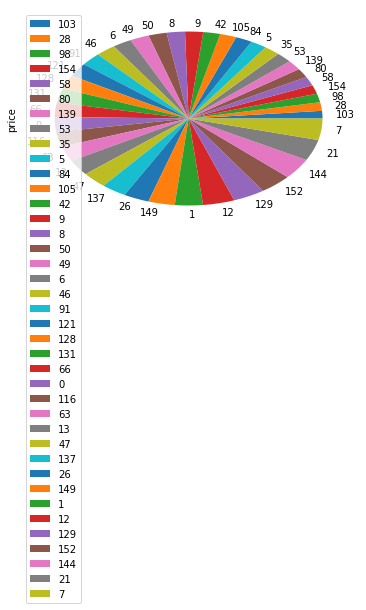

In [21]:
t3_sorted.plot.pie(y="price");

<h3 dir="rtl">گوشی هایی که براساس قیمت در ربع چهارم قرار دارند</h3>
<h3 dir="rtl">لازم به ذکر است که تمامی گوشی ها از کم ترین قیمت تا بالاترین قیمت مرتب شده اند</h3>

In [22]:
t4 = table[table["price"] > q3]
t4_sorted = t4.sort_values(by="price")

In [23]:
print('تعداد گوشی ها = %s' % (t4["info"].count()))
print('بیشترین قیمت = %s' % (t4["price"].max()))
print('کمترین قیمت = %s' % (t4["price"].min()))
t4_sorted

تعداد گوشی ها = 40
بیشترین قیمت = 26799000
کمترین قیمت = 3300000


,info,price
67,گوشی موبایل نوکیا مدل 6.2 TA-1198DS دو سیم کار...,3300000
37,گوشی موبایل سامسونگ مدل Galaxy A30s SM-A307FN/...,3335000
32,گوشی موبایل هوآوی مدل P30 Lite MAR-LX1M دو سیم...,3459000
4,گوشی موبایل سامسونگ مدل Galaxy A30s SM-A307FN/...,3490000
55,گوشی موبایل سامسونگ مدل Galaxy A30s SM-A307FN/...,3498000
10,گوشی موبایل هوآوی مدل Y9s STK-L21 دو سیم کارت ...,3540000
114,گوشی موبایل شیائومی مدل Mi 8 SE M1805E2A دو سی...,3559000
156,گوشی موبایل ال جی مدل W30 LM-X440IM دو سیم ک...,3699000
146,گوشی موبایل ال جی مدل Q60 LM-X525EAW دو سیم ک...,3729000
34,گوشی موبایل هوآوی مدل P30 Lite MAR-LX1A دو سیم...,3790000


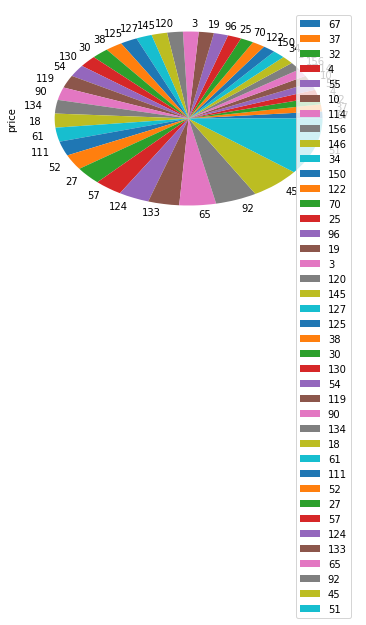

In [24]:
t4_sorted.plot.pie(y="price");